In [ ]:
'''
Question 1:
Importing libraries
Importing all stock files
'''

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
import glob
import plotly
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\aditi\\Desktop\\Python\\Exam1'

In [3]:
os.chdir('/Users/aditi/Desktop/Python/Exam1/stock-time-series-20050101-to-20171231 (1)')

In [4]:
#Importing data
path = '.'
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]

for i in files_in_dir:
    a = i.find('_')
    b = i[0:a]
    #print(b)
    exec(b.lower() + " = pd.read_csv(i)")

all_stock = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
all_stock2 = pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')

In [5]:
#Converting to datetime 
aapl['Date'] = pd.to_datetime(aapl['Date'])
amzn['Date'] = pd.to_datetime(amzn['Date'])
csco['Date'] = pd.to_datetime(csco['Date'])
msft['Date'] = pd.to_datetime(msft['Date'])
ibm['Date'] = pd.to_datetime(ibm['Date'])
googl['Date'] = pd.to_datetime(googl['Date'])
intc['Date'] = pd.to_datetime(intc['Date'])

In [ ]:
'''Question 2: 
•	Done a descriptive analysis of all the stocks - head, describe, info, shape
•	Used unique to find all the stock names within the dataset
•	Created a column Year 
•	Calculated the Daily Returns
•	Calculated the highest daily returns in each year
    Highest return points can be seen in AMZN, AABA, GOOGL, CSCO, NKE, MRK for different years.
    In 2008 AABA has the highest return of 0.479666 on one particular day
•	Calculated the lowest daily returns in each year
    Lowest return points can be seen in AABA, AMZN, JPM, CSCO, AAPL
    In 2006 AABA has the lowest return of all time of -0.218362 on a particular day
•	The average returns will give us a better picture since we see that AAPL has the highest peak point as well as lowest in 
    some years. 
•	Calculated the average returns for each of the stocks and plotted them for all the years.
    The figure shows us that AMZN and AAPL have high returns on an average in different years.
•	Calculated the max close over time. We can see GOOGL and AMZN have the highest closing shares overall. 
•	Since calculating the max and min values does not give us a real picture I have calculated the average closing prices for 
    all the stocks and plotted them. We can see that GOOGL and AMZN have very high closing prices.
•	Calculating the average volume trade for each year for all the stocks. The volume trade of stocks is very high for AAPL over
    the years.
•	Plotted facet graph for the average volume over time from 2006 – 2017 for all the stocks. We see high average volume for AAPL.
•	Plotted a facet graph for the average daily returns over time from 2006-2017 for all the stocks
•	The above graphs give us an idea of the trends for all the stocks over time. 
•	Focusing more on the average returns rather than the average close or open as those will be relative for each stock but 
    the daily returns are comparable within stocks
'''

In [6]:
all_stock.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [7]:
all_stock.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [8]:
all_stock.shape

(93612, 7)

In [9]:
#To see the stocks present in the all_stock file
unique_names = all_stock['Name'].unique()
unique_names

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [10]:
#Finding the year for each value
all_stock['Year'] = pd.to_datetime(all_stock['Date']).dt.year
#Calculating the Daily Returns
all_stock['DailyReturn'] = all_stock['Close'].pct_change(1)
all_stock.head()

,Date,Open,High,Low,Close,Volume,Name,Year,DailyReturn
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,NaN
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,-0.005056
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,-0.009148
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,0.008206
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,0.004960


In [11]:
#Since for the start date of each Stock i.e 2006-01-03 the value calculated will be incorrect 
#as it should be NAN or 0 I will replace all those values in the dataset by 0

for i in range(0, len(all_stock)):
    if all_stock['Date'][i]  == '2006-01-03':
        all_stock['DailyReturn'][i] = np.nan

all_stock.head()

C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Date,Open,High,Low,Close,Volume,Name,Year,DailyReturn
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,NaN
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,-0.005056
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,-0.009148
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,0.008206
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,0.004960


In [12]:
#Converting to datetime format
all_stock['Date'] = pd.to_datetime(all_stock['Date'])

In [13]:
#Highest daily returns in each year 
#Highest return points can be seen in AMZN, AABA, GOOGL, CSCO, NKE, MRK
df = all_stock.groupby(['Year'], as_index = False)['DailyReturn'].max()
highest_return = pd.merge(df, all_stock, how = 'left', on =['DailyReturn', 'Year'] )
highest_return

,Year,DailyReturn,Date,Open,High,Low,Close,Volume,Name
0,2006,0.144014,2006-08-09,19.41,19.95,19.35,19.78,221613148,CSCO
1,2007,0.269497,2007-04-25,53.12,57.18,52.95,56.81,104404589,AMZN
2,2008,0.479666,2008-02-01,28.68,29.83,27.34,28.38,438231658,AABA
3,2009,0.267951,2009-10-23,111.05,119.65,110.62,118.49,58305777,AMZN
4,2010,0.111879,2010-10-15,299.93,301.12,296.10,301.03,14824722,GOOGL
5,2011,0.159505,2011-08-11,15.45,16.24,15.36,15.92,286920002,CSCO
6,2012,0.157457,2012-04-27,224.83,228.69,220.22,226.85,22112329,AMZN
7,2013,0.137960,2013-10-18,488.78,508.24,487.49,506.21,11584258,GOOGL
8,2014,0.122116,2014-09-26,43.99,45.00,43.65,44.75,35108796,NKE
9,2015,0.162584,2015-07-17,680.00,703.00,678.00,699.62,12858136,GOOGL


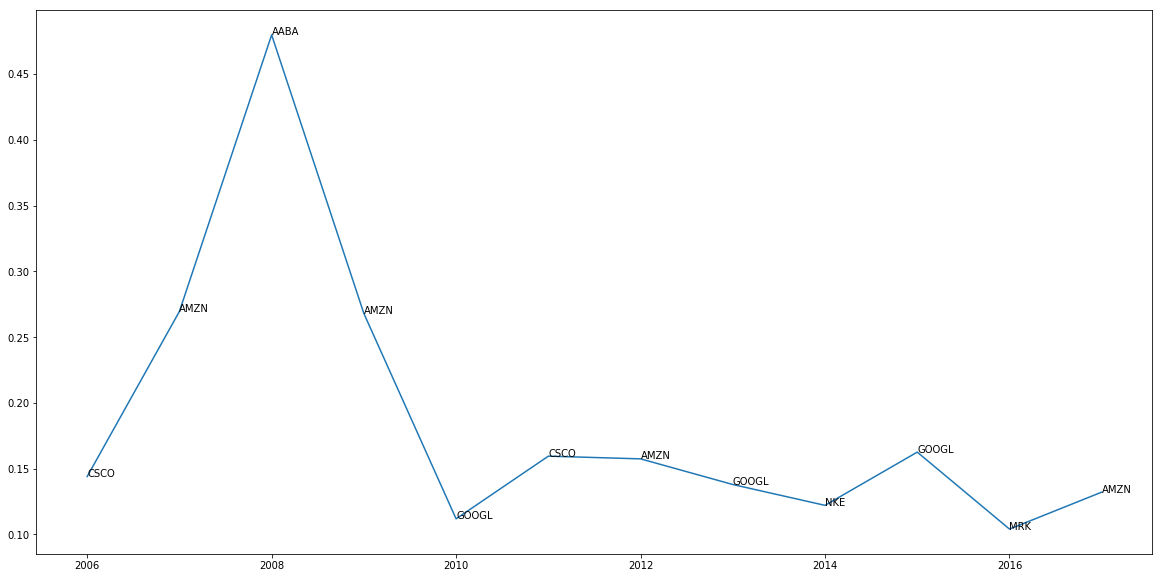

In [14]:
#Plotting the highest daily returns over time - We can see AABA had the highest return over time in 2008
y = highest_return['DailyReturn']
x = highest_return['Year']
label = highest_return['Name']

fig, ax = plt.subplots(figsize=(20,10)) 
ax.plot(x, y)

for i, txt in enumerate(label):
    ax.annotate(txt, (x[i], y[i]))

In [15]:
#Lowest daily returns in each year 
#Lowest return points can be seen in AABA, AMZN, JPM, CSCO, AAPL
df = all_stock.groupby(['Year'], as_index = False)['DailyReturn'].min()
lowest_return = pd.merge(df, all_stock, how = 'left', on =['DailyReturn', 'Year'] )
lowest_return

,Year,DailyReturn,Date,Open,High,Low,Close,Volume,Name
0,2006,-0.218362,2006-07-19,26.41,26.70,25.04,25.20,204412426,AABA
1,2007,-0.119917,2007-10-24,90.87,90.88,83.27,88.73,41617368,AMZN
2,2008,-0.208658,2008-11-19,11.54,11.58,9.07,9.14,57696967,AABA
3,2009,-0.207274,2009-01-20,21.00,21.27,17.70,18.09,142148970,JPM
4,2010,-0.162107,2010-11-11,20.46,20.96,20.25,20.52,553078278,CSCO
5,2011,-0.141561,2011-02-10,19.65,19.70,18.79,18.92,560038939,CSCO
6,2012,-0.104899,2012-05-10,17.17,17.32,16.76,16.81,198450536,CSCO
7,2013,-0.123519,2013-01-24,65.71,66.53,64.32,64.36,365212953,AAPL
8,2014,-0.109972,2014-01-31,371.76,375.45,357.76,358.69,16181519,AMZN
9,2015,-0.100405,2015-10-14,66.61,67.95,60.02,60.03,80626370,WMT


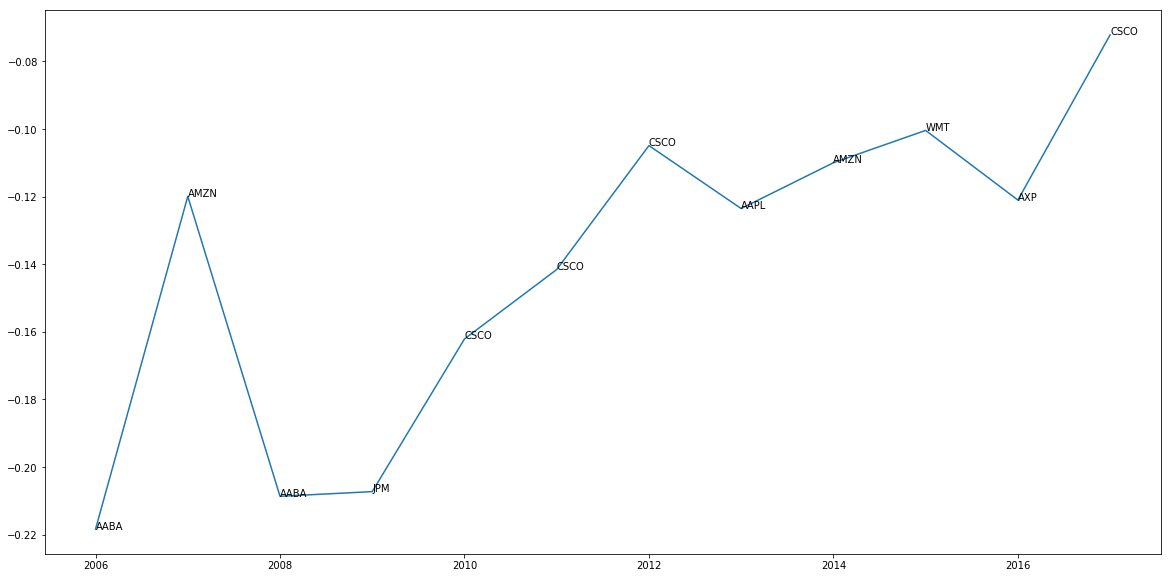

In [16]:
#Plotting the lowest daily returns over time - Surprisingly we can see AABA had the lowest return over time in 2006 and AMZN 
# and APPL also come in this category
y = lowest_return['DailyReturn'] 
x = lowest_return['Year']
label = lowest_return['Name']

fig, ax = plt.subplots(figsize=(20,10)) 
ax.plot(x, y)

for i, txt in enumerate(label):
    ax.annotate(txt, (x[i], y[i]))

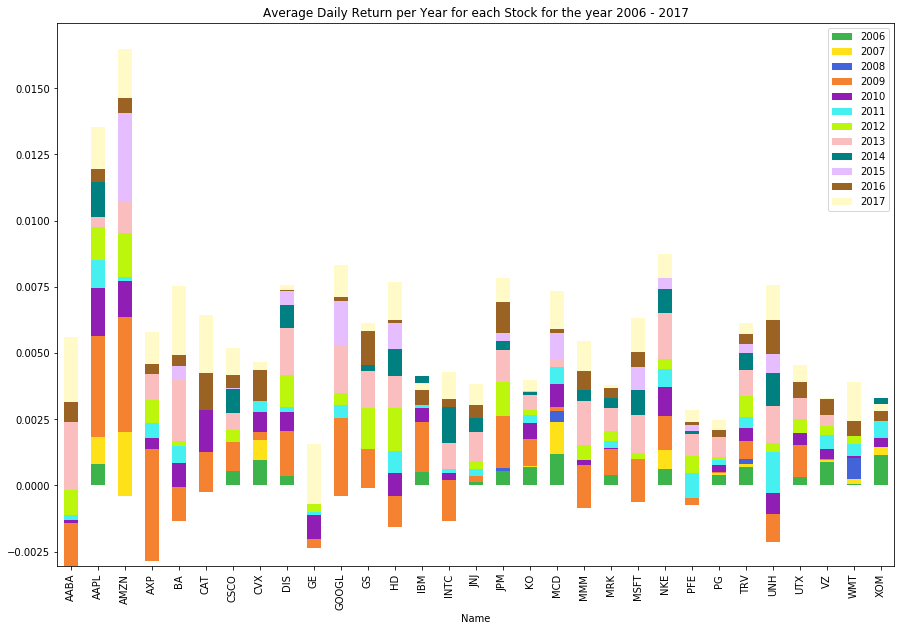

In [17]:
#Calculating the average returns in each year.-To see the trend over the years for all stocks.AMZN and APPL give us high returns
df_avgReturn = all_stock.groupby(['Year','Name'], as_index = False)['DailyReturn'].mean()
df = df_avgReturn
fig, ax = plt.subplots(figsize=(10,7))  
years = df['Year'].drop_duplicates()
margin_bottom = np.zeros(len(df['Name'].drop_duplicates()))
colors = ['#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
#colors = ["#ddccff","#b3d9ff","#9999ff"]
for num, year in enumerate(years):
    values = list(df[df['Year'] == year].loc[:, 'DailyReturn'])

    df[df['Year'] == year].plot.bar(x='Name',y='DailyReturn', ax=ax, 
                                    bottom = margin_bottom, color=colors[num], label=year,
                                   title = "Average Daily Return per Year for each Stock for the year 2006 - 2017", 
                                    figsize = (15,10))
    margin_bottom += values

plt.show()

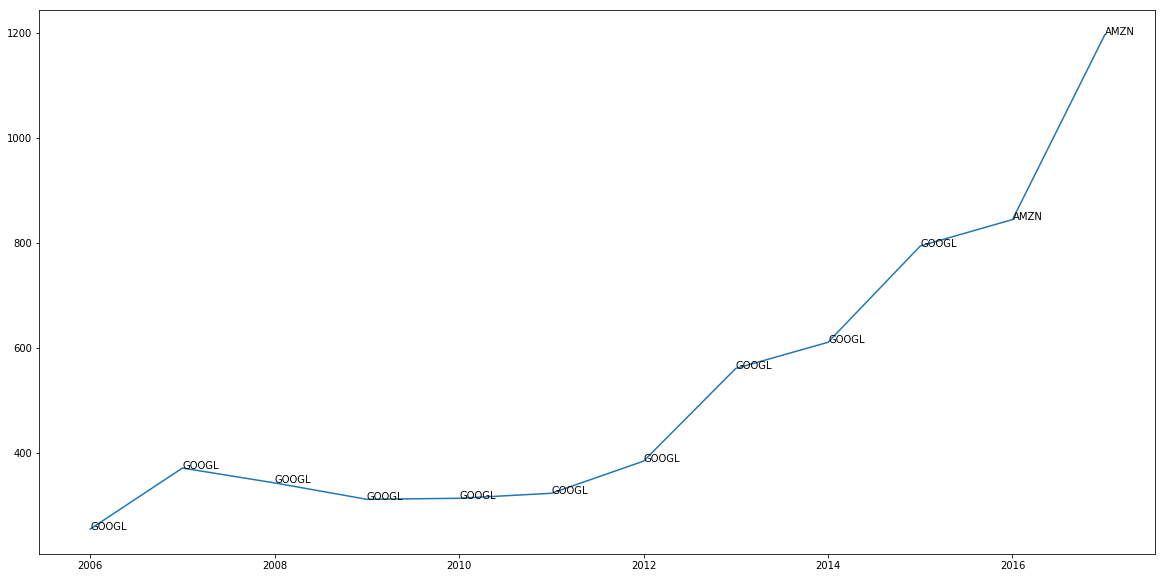

In [18]:
#Highest close in each year over time - We can see GOOGL and AMZ at the top
df = all_stock.groupby(['Year'], as_index = False)['Close'].max()
highest_close = pd.merge(df, all_stock, how = 'left', on =['Close', 'Year'] )
#Plotting the Highest close in each year over time 
y = highest_close['Close']
x = highest_close['Year']
label = highest_close['Name']

fig, ax = plt.subplots(figsize=(20,10)) 
ax.plot(x, y)

for i, txt in enumerate(label):
    ax.annotate(txt, (x[i], y[i]))

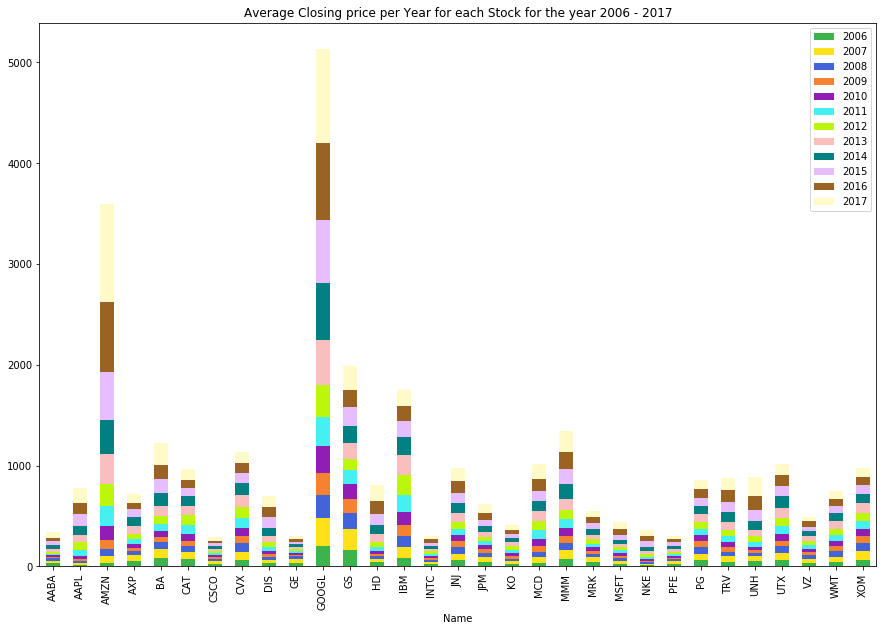

In [19]:
#Average closing values each year - GOOGL and AMZN are at the top
df_close = all_stock.groupby(['Year','Name'], as_index = False)['Close'].mean()
#Plotting a stacked bar chart for last 3 years
df = df_close
fig, ax = plt.subplots(figsize=(10,7))  
years = df['Year'].drop_duplicates()
margin_bottom = np.zeros(len(df['Name'].drop_duplicates()))
colors = ['#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

for num, year in enumerate(years):
    values = list(df[df['Year'] == year].loc[:, 'Close'])

    df[df['Year'] == year].plot.bar(x='Name',y='Close', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=year,
                                   title = "Average Closing price per Year for each Stock for the year 2006 - 2017", 
                                    figsize = (15,10))
    margin_bottom += values

plt.show()

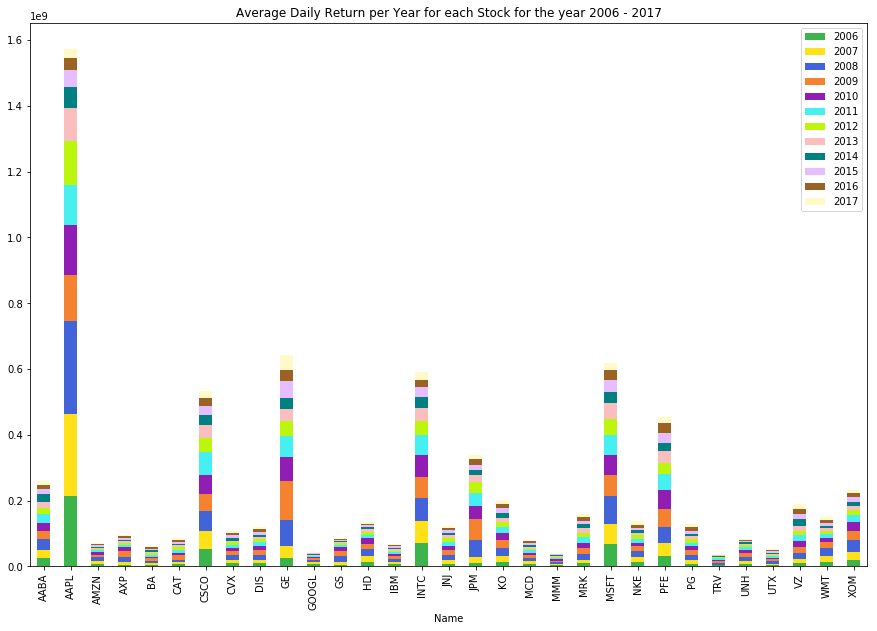

In [20]:
#Calculating the average volume in each year.-To see the trend over the years for all stocks. - Apple seems to have the highest avg volume
df_avgVolume = all_stock.groupby(['Year','Name'], as_index = False)['Volume'].mean()
df = df_avgVolume
fig, ax = plt.subplots(figsize=(10,7))  
years = df['Year'].drop_duplicates()
margin_bottom = np.zeros(len(df['Name'].drop_duplicates()))
colors = ['#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
for num, year in enumerate(years):
    values = list(df[df['Year'] == year].loc[:, 'Volume'])

    df[df['Year'] == year].plot.bar(x='Name',y='Volume', ax=ax, 
                                    bottom = margin_bottom, color=colors[num], label=year,
                                   title = "Average Daily Return per Year for each Stock for the year 2006 - 2017", 
                                    figsize = (15,10))
    margin_bottom += values

plt.show()

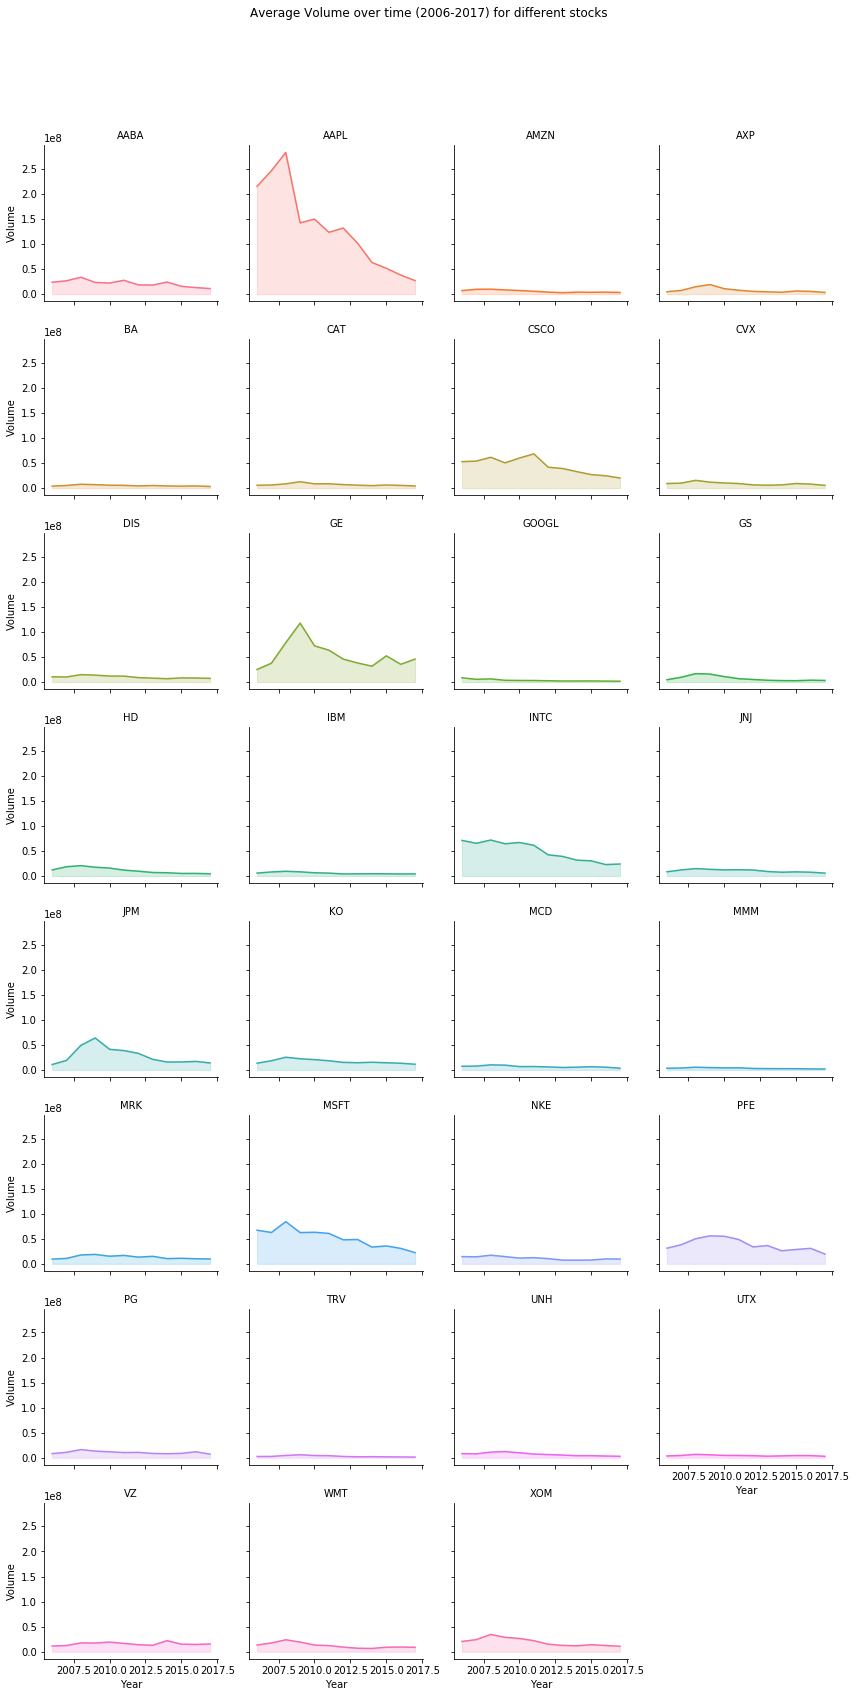

In [21]:
# Plotting the average volume for each stock individually from 2006 - 2017
g = sns.FacetGrid(df_avgVolume, col='Name', hue='Name', col_wrap=4 )
g = g.map(plt.plot, 'Year', 'Volume')
g = g.map(plt.fill_between, 'Year', 'Volume', alpha=0.2).set_titles("{col_name} Name")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.90)
g = g.fig.suptitle('Average Volume over time (2006-2017) for different stocks')

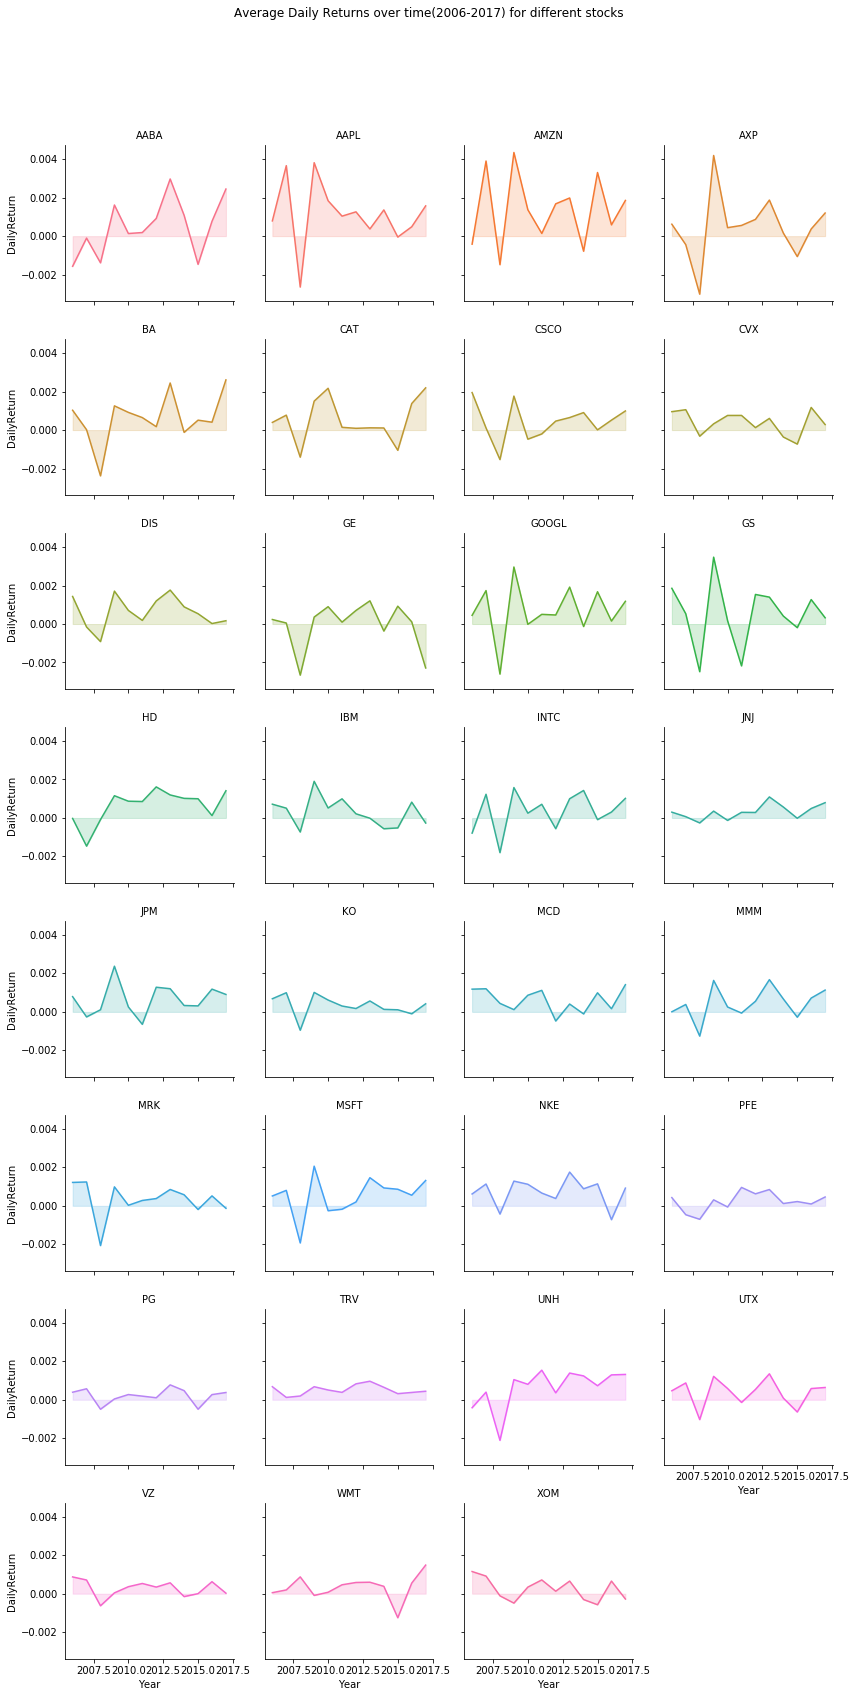

In [22]:
# Plotting the average daily returns for each stock individually from 2006 - 2017
# In 2008 we can see a drop in most graphs
g = sns.FacetGrid(df_avgReturn, col='Name', hue='Name', col_wrap=4 )
g = g.map(plt.plot, 'Year', 'DailyReturn')
g = g.map(plt.fill_between, 'Year', 'DailyReturn', alpha=0.2).set_titles("{col_name} Name")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.90)
g = g.fig.suptitle('Average Daily Returns over time(2006-2017) for different stocks')

In [33]:
''' 
Question 3.
Descriptive analysis of Apple Stock:
•	Used Describe, head, info to get an idea of the dataset. We can see that the closing stock ranges from 7.24 to 176.42
•	Calculated the max and min closing and opening stock prices for each year to get an idea of the highest and lowest points 
    from 2006 to 2017
•	Visualized the Closing and Opening trends for apple for 2006 and 2017 to get an idea of where the company was in 2006 and 
    where it has now reached
•	Also visualized the trends from 2006 – 2017 overall. We can see the years with sudden drop were 2008 & 2013- 14.
•	Calculated daily returns using pandas inbuilt function and visualized daily returns for 2006, 2017 and overall 
    from 2006 – 2017. This gives us an actual idea of the daily growth or fall in stock.
•	Analyzed the volume trend for 2006, 2017 and overall from 2006 – 2017. Surprisingly the volume seems to have decreased 
    over the years for apple shares
•	Visualized the moving averages for September – December 2017
#Descriptive and Comparative analysis on Google:
•	Used Describe, head, info to get an idea of the dataset.
•	Calculated the daily returns for google
•	Visualized the volume, closing price and daily returns using a facet grid for apple and google
•	Calculated the maximum and minimum opening and closing prices for Google
•	Compared the closing prices to those of apple by visualizing. The graphs show us that the share prices of Google are 
    much higher than those of Apple.
•	Visualized the comparison of the closing trends for 2006 and 2017 for Google and Apple
•	Visualized the comparison of the daily returns in 2006 and 2017 for Google and Apple. This gives us a better comparison 
    as it tells us more about the growth than just looking at the closing stock prices.
•	Compared the volumes for Apple and Google for 2006 and 2017. The volume of Apple seems much higher than that of Google.
•	Created a jointplot to compare the Daily Returns for Apple and Google in 2017
•	Created a pairplot to visualize all the parameters – Open, High, Low, Close and Volme for Apple and Google. This shows 
    us the trends for the two. 
'''

' \nQuestion 3.\nDescriptive analysis of Apple Stock\n- Used Describe, head, info to get an idea of the dataset.\n- Visualized the Closing and Opening trends for apple for 2006 and 2017\n- Calculated daily returns using pandas inbuilt function and visualized daily returns for 2006, 2017 and overall from 2006 - 2017\n- Using the table above to find returns on apple stocks from 2006 (each compared to the starting value) - found out the highest return rates of each year\n'

In [23]:
aapl.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [24]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [25]:
#Calculating the daily return for all stocks and apple
aapl['DailyReturn'] = aapl['Close'].pct_change(1)
aapl.head()  

,Date,Open,High,Low,Close,Volume,Name,DailyReturn
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL,NaN
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL,0.002809
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL,-0.007470
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL,0.025400
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL,-0.003670


In [26]:
#Finding the yearly summary for each value
aapl['Year'] = pd.to_datetime(aapl['Date']).dt.year
df_max_close = aapl.groupby(['Year'],as_index=False)['Close'].max()
df_min_close = aapl.groupby(['Year'],as_index=False)['Close'].min()
df_max_open = aapl.groupby(['Year'],as_index=False)['Open'].max()
df_min_open = aapl.groupby(['Year'],as_index=False)['Open'].min()
df_yearly_summary = pd.merge(pd.merge(pd.merge(df_max_close,df_min_close, on = "Year"), df_max_open, on = "Year"), df_min_open, on = "Year")
df_yearly_summary.columns = ['Year', 'MaxClose','MinClose','MaxOpen','MinOpen']
df_yearly_summary = df_yearly_summary.set_index('Year', inplace=False)
df_yearly_summary

,MaxClose,MinClose,MaxOpen,MinOpen
Year,,,,
2006,13.12,7.24,13.29,7.39
2007,28.55,11.90,28.66,11.86
2008,27.85,11.50,28.47,11.70
2009,30.23,11.17,30.45,11.34
2010,46.50,27.44,46.60,27.48
2011,60.32,45.05,60.25,45.24
2012,100.30,58.75,100.34,58.49
2013,81.44,55.79,81.81,55.42
2014,119.00,71.40,119.27,70.74


Text(0,0.5,'Stock Price')

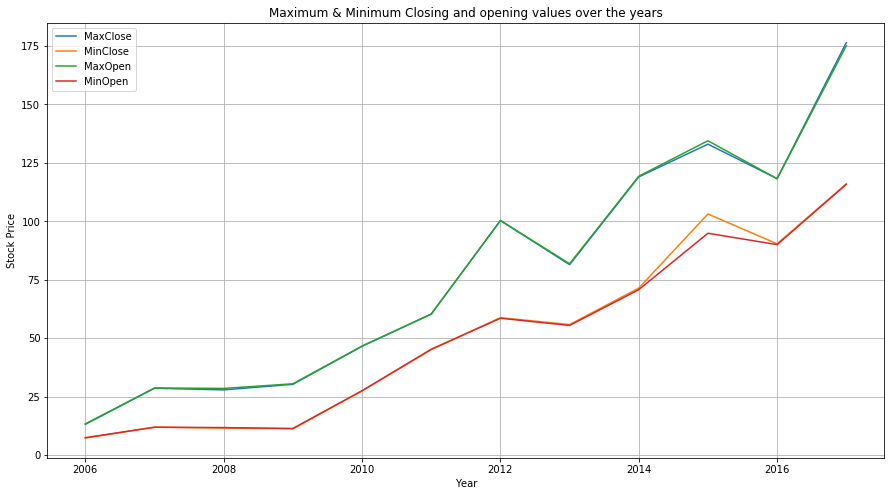

In [27]:
plot_yearly_summary = df_yearly_summary.plot(grid = True,figsize=(15,8), title="Maximum & Minimum Closing and opening values over the years")
plot_yearly_summary.set_ylabel("Stock Price")

C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



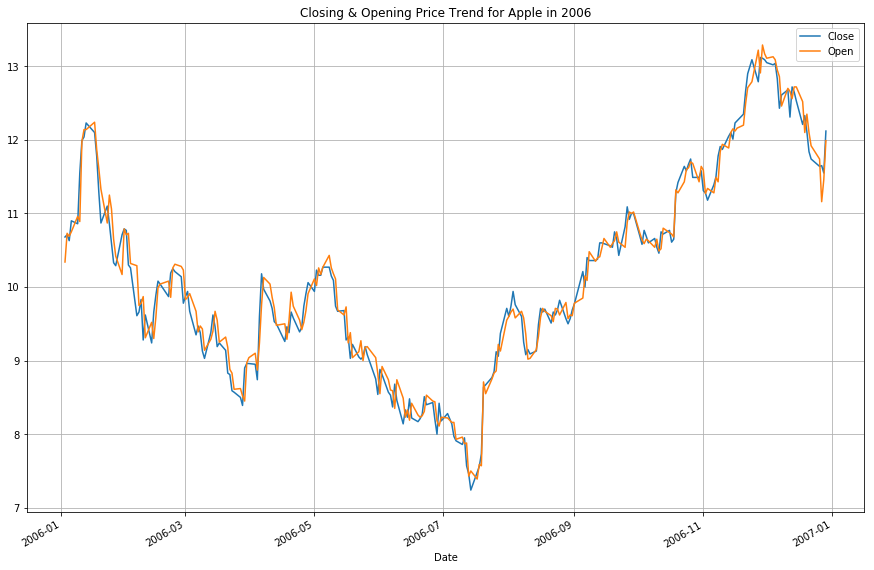

In [28]:
# Plotting closing and opening stocks for Apple in 2006
aapl_2006 = aapl[(aapl['Date']>='2006-01-01') & (aapl['Date']<'2007-01-01')]
aapl_2006['Date'] = pd.to_datetime(aapl_2006['Date'])
aapl_df1 = pd.DataFrame({"Date":aapl_2006["Date"], "Close": aapl_2006["Close"], "Open": aapl_2006["Open"]})
aapl_df1 = aapl_df1.set_index('Date', inplace=False)
plot1 = aapl_df1.plot(grid = True,figsize=(15,10), title="Closing & Opening Price Trend for Apple in 2006")


C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



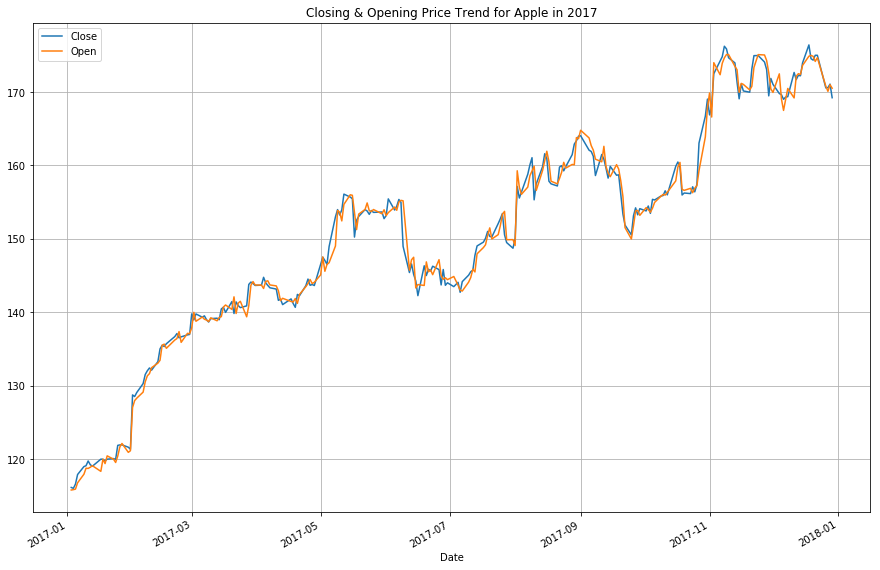

In [29]:
# Plotting closing and opening stocks for Apple in 2017
aapl_2017 = aapl[(aapl['Date']>='2017-01-01') & (aapl['Date']<'2018-01-01')]
aapl_2017['Date'] = pd.to_datetime(aapl_2017['Date'])
aapl_df2 = pd.DataFrame({"Date":aapl_2017["Date"], "Close": aapl_2017["Close"], "Open": aapl_2017["Open"]})
aapl_df2 = aapl_df2.set_index('Date', inplace=False)
plot2 = aapl_df2.plot(grid = True,figsize=(15,10), title="Closing & Opening Price Trend for Apple in 2017")

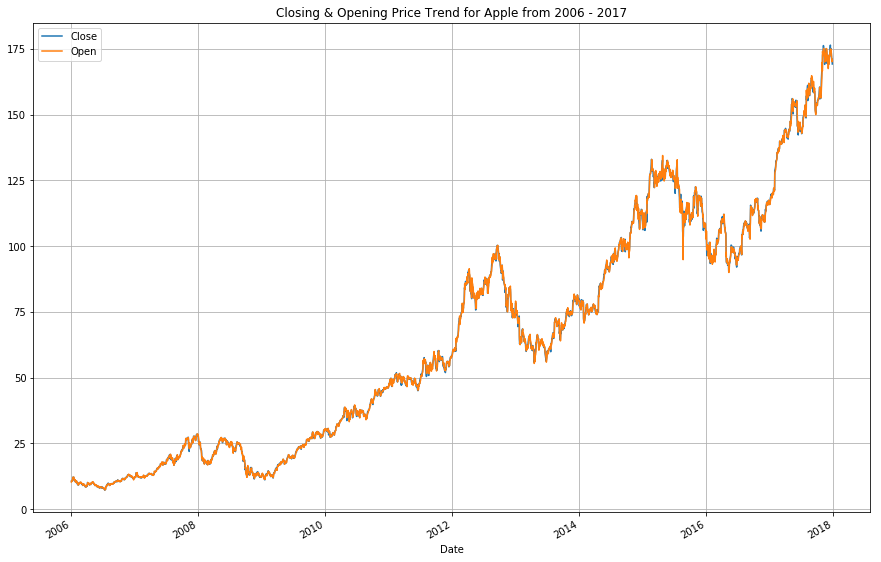

In [30]:
# Plotting closing and opening stocks for Apple from 2006 - 2017
aapl_2006_2017 = aapl
aapl_2006_2017['Date'] = pd.to_datetime(aapl_2006_2017['Date'])
aapl_df2 = pd.DataFrame({"Date":aapl_2006_2017["Date"], "Close": aapl_2006_2017["Close"], "Open": aapl_2006_2017["Open"]})
aapl_df2 = aapl_df2.set_index('Date', inplace=False)
plot2 = aapl_df2.plot(grid = True,figsize=(15,10), title="Closing & Opening Price Trend for Apple from 2006 - 2017")

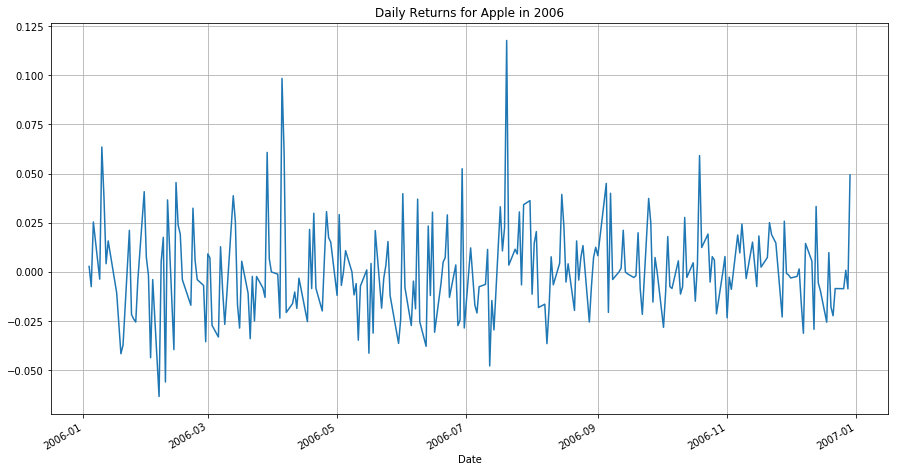

In [31]:
#Plotting the daily returns in year 2006 for Apple
aapl_2006_return = aapl_2006.set_index('Date', inplace=False)
aapl_2006_return['DailyReturn'].plot(grid = True, figsize=(15, 8), title="Daily Returns for Apple in 2006")

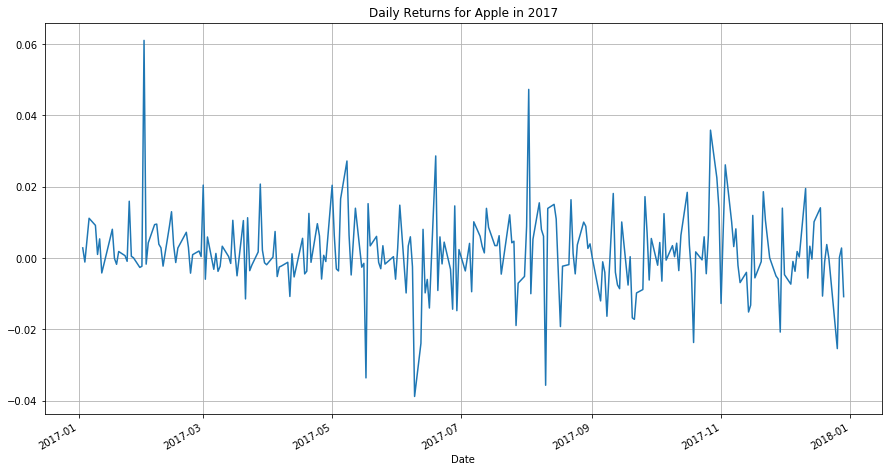

In [57]:
#Plotting the daily returns in year 2017 for Apple
#Plotting the daily returns in year 2006 for Apple
aapl_2017_return = aapl_2017.set_index('Date', inplace=False)
aapl_2017_return['DailyReturn'].plot(grid = True, figsize=(15, 8), title="Daily Returns for Apple in 2017")

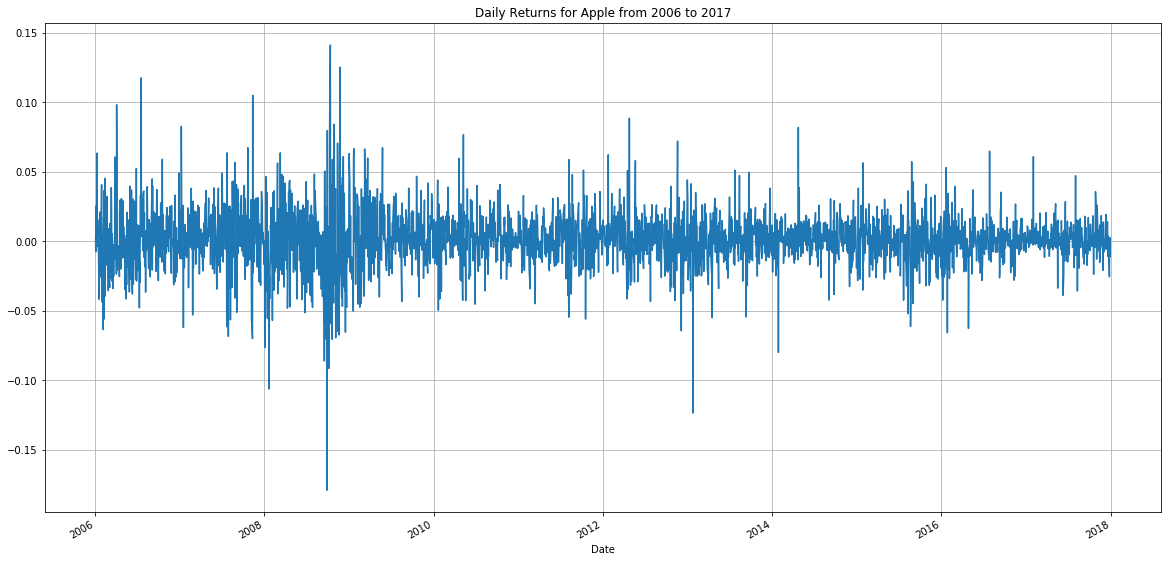

In [33]:
#Plotting the daily returns from 2006 - 2017 for Apple
df_aapl = aapl
df_aapl = df_aapl.set_index('Date', inplace=False)
df_aapl['DailyReturn'].plot(grid = True, figsize=(20,10), title="Daily Returns for Apple from 2006 to 2017")

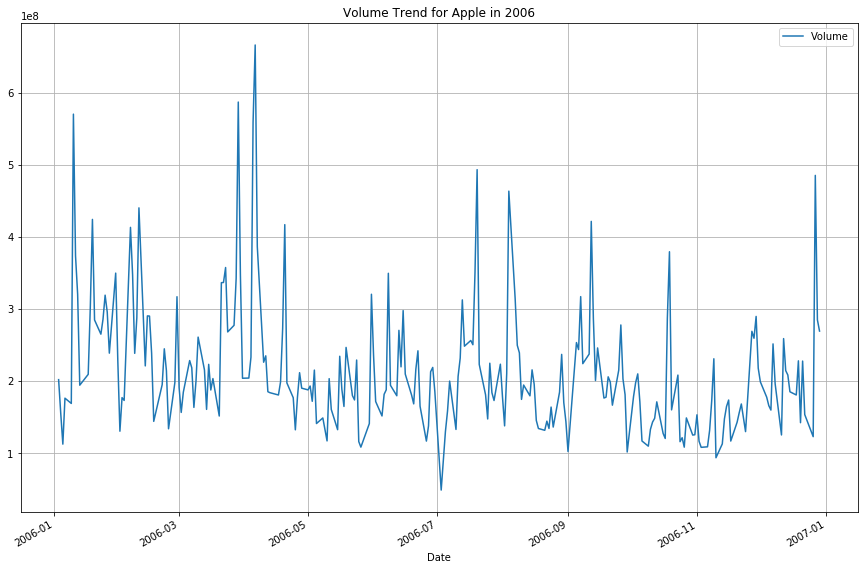

In [34]:
#Analyzing volume trends
aapl_volume_2006 = pd.DataFrame({"Date":aapl_2006["Date"], "Volume": aapl_2006["Volume"]})
aapl_volume_2006 = aapl_volume_2006.set_index('Date', inplace=False)
plot1 = aapl_volume_2006.plot(grid = True,figsize=(15,10), title="Volume Trend for Apple in 2006")


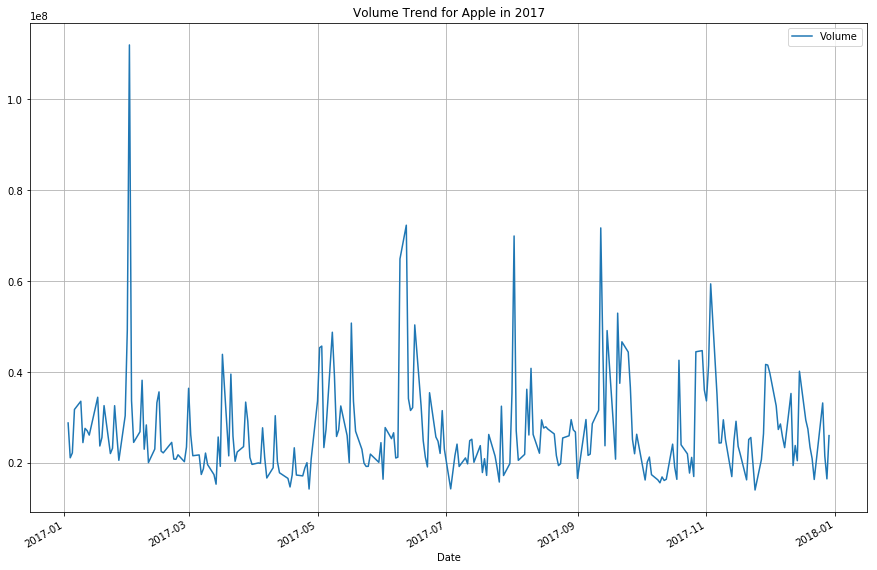

In [35]:
#Analyzing volume trends in 2017
aapl_volume_2017 = pd.DataFrame({"Date":aapl_2017["Date"], "Volume": aapl_2017["Volume"]})
aapl_volume_2017 = aapl_volume_2017.set_index('Date', inplace=False)
plot1 = aapl_volume_2017.plot(grid = True,figsize=(15,10), title="Volume Trend for Apple in 2017")


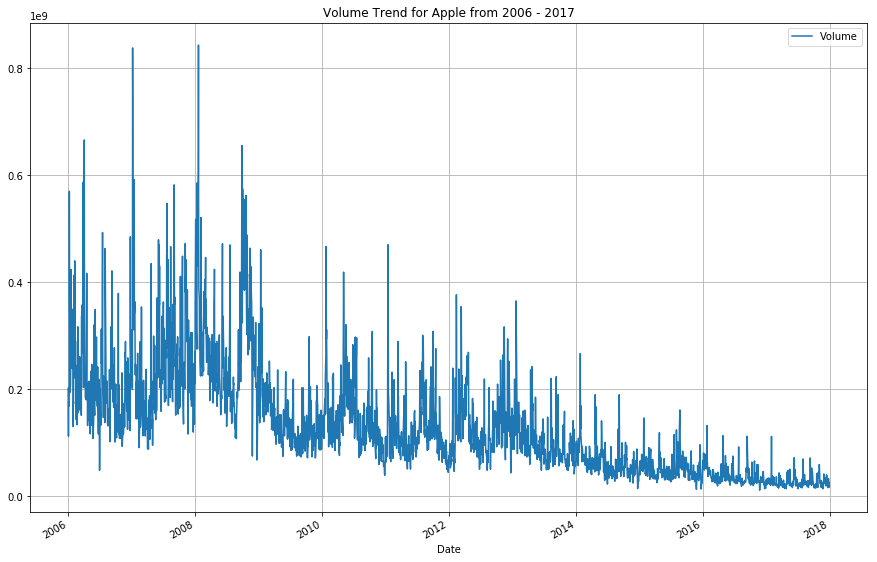

In [36]:
#Analyzing volume traded per day for Apple
aapl_vol = pd.DataFrame({"Date":aapl["Date"], "Volume": aapl["Volume"]})
aapl_vol = aapl_vol.set_index('Date', inplace=False)
plot1 = aapl_vol.plot(grid = True,figsize=(15,10), title="Volume Trend for Apple from 2006 - 2017")


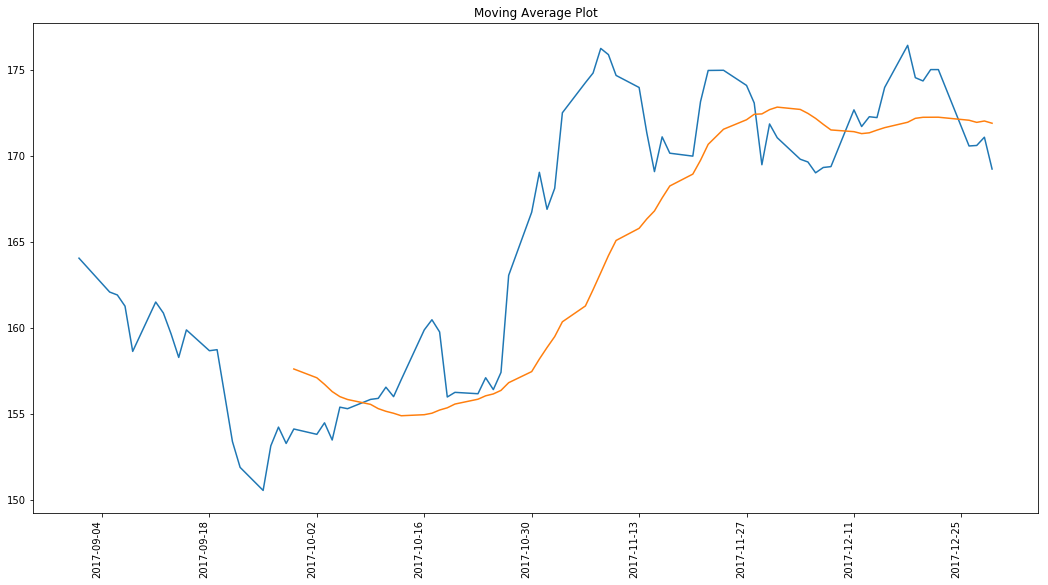

In [37]:
#Moving Average for 2017 September to December
aapl_df2= aapl[aapl['Date']>='2017-09-01']
date_range = aapl_df2['Date']
fig = plt.figure()
fig.set_size_inches(18,10)
ax=fig.add_subplot(111,title="Moving Average Plot")

ax.plot(date_range,aapl_df2['Close'].values,label="Original")
ax.plot(date_range,aapl_df2.rolling(window=20,center=False)["Close"].mean().values)
fig.autofmt_xdate(rotation=90)

In [38]:
#Descriptive analysis for Google in comparision to Apple

In [39]:
googl.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [40]:
googl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [41]:
#Calculating the daily return
googl['DailyReturn'] = googl['Close'].pct_change(1)
googl.head()  

,Date,Open,High,Low,Close,Volume,Name,DailyReturn
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,0.023000
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,0.013507
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,0.031924
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,0.002660


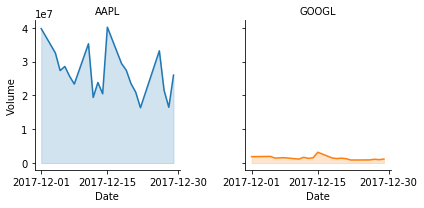

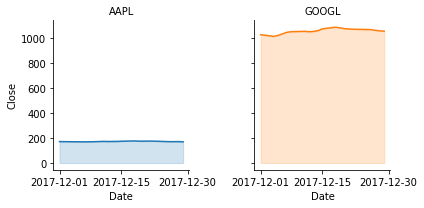

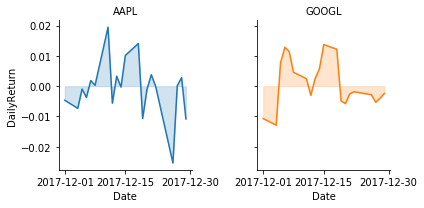

In [42]:
# Visualising all the parameters for Apple and Google 
df_facet = all_stock[(all_stock['Name'] == 'AAPL') | (all_stock['Name'] == 'GOOGL')]
df_facet = df_facet[df_facet['Date']>='2017-12-01']

# Plotting the data Using Facet Grid
g = sns.FacetGrid(df_facet, col='Name', hue='Name')
g = g.map(plt.plot, 'Date', 'Volume')
g = g.map(plt.fill_between, 'Date', 'Volume', alpha=0.2).set_titles("{col_name} Name")
g = g.set_titles("{col_name}")
g = g.set(xticks=['2017-12-01','2017-12-15','2017-12-30'])

h = sns.FacetGrid(df_facet, col='Name', hue='Name')
h = h.map(plt.plot, 'Date', 'Close')
h = h.map(plt.fill_between, 'Date', 'Close', alpha=0.2).set_titles("{col_name} Name")
h = h.set_titles("{col_name}")
h = h.set(xticks=['2017-12-01','2017-12-15','2017-12-30'])

i = sns.FacetGrid(df_facet, col='Name', hue='Name')
i = i.map(plt.plot, 'Date', 'DailyReturn')
i = i.map(plt.fill_between, 'Date', 'DailyReturn', alpha=0.2).set_titles("{col_name} Name")
i = i.set_titles("{col_name}")
i = i.set(xticks=['2017-12-01','2017-12-15','2017-12-30'])

In [43]:
#Finding the yearly summary for each value
googl['Year'] = pd.to_datetime(googl['Date']).dt.year
df_max_close = googl.groupby(['Year'],as_index=False)['Close'].max()
df_min_close = googl.groupby(['Year'],as_index=False)['Close'].min()
df_max_open = googl.groupby(['Year'],as_index=False)['Open'].max()
df_min_open = googl.groupby(['Year'],as_index=False)['Open'].min()
df_yearly_summary_googl = pd.merge(pd.merge(pd.merge(df_max_close,df_min_close, on = "Year"), df_max_open, on = "Year"), df_min_open, on = "Year")
df_yearly_summary_googl.columns = ['Year', 'MaxClose','MinClose','MaxOpen','MinOpen']
df_yearly_summary_googl = df_yearly_summary_googl.set_index('Year', inplace=False)
df_yearly_summary_googl


,MaxClose,MinClose,MaxOpen,MinOpen
Year,,,,
2006,255.08,168.70,255.74,168.74
2007,371.27,219.56,370.94,218.73
2008,343.01,128.85,346.78,131.39
2009,311.75,141.52,312.69,144.32
2010,313.70,218.25,315.32,219.37
2011,323.27,237.68,321.70,237.20
2012,384.41,279.80,385.74,280.45
2013,560.92,351.79,560.73,352.68
2014,610.70,498.16,614.01,499.86


Text(0,0.5,'Stock Price')

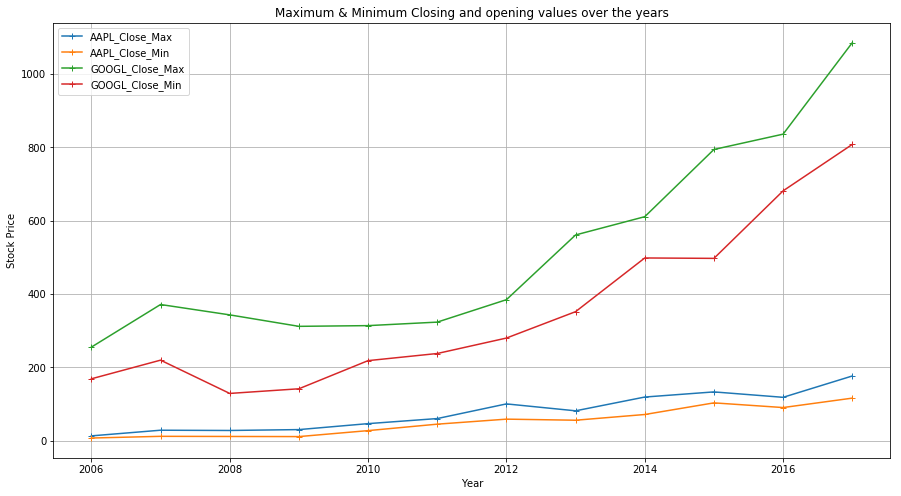

In [44]:
#Comparing the max and min close value for apple and google
googl_appl_summary = pd.DataFrame({"AAPL_Close_Max": df_yearly_summary["MaxClose"],
                      "AAPL_Close_Min": df_yearly_summary["MinClose"],
                      "GOOGL_Close_Max": df_yearly_summary_googl["MaxClose"],
                      "GOOGL_Close_Min": df_yearly_summary_googl["MinClose"]
                      })
plot_yearly_summary = googl_appl_summary.plot(grid = True,figsize=(15,8), 
                                              title="Maximum & Minimum Closing and opening values over the years",
                                              marker='+')
plot_yearly_summary.set_ylabel("Stock Price")

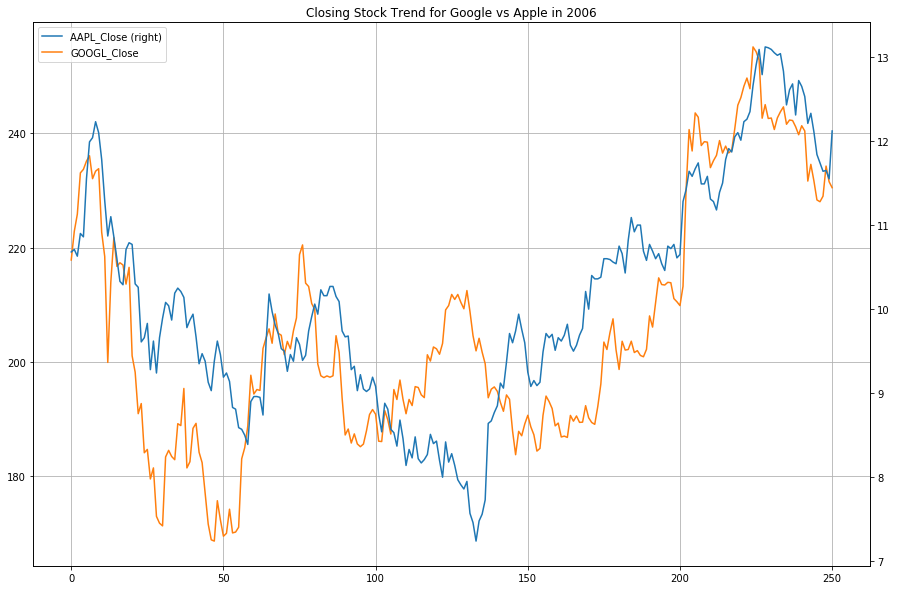

In [45]:
# Plotting closing stocks for Google vs Apple in 2006
googl_2006 = googl[(googl['Date']>='2006-01-01') & (googl['Date']<'2007-01-01')]
googl_2006.set_index('Date', inplace=False)
googl_appl_close = pd.DataFrame({"AAPL_Close": aapl_2006["Close"],
                                   "GOOGL_Close": googl_2006["Close"]
                                  })

plot1 = googl_appl_close.plot(secondary_y=['AAPL_Close'], grid = True,figsize=(15,10), title="Closing Stock Trend for Google vs Apple in 2006")

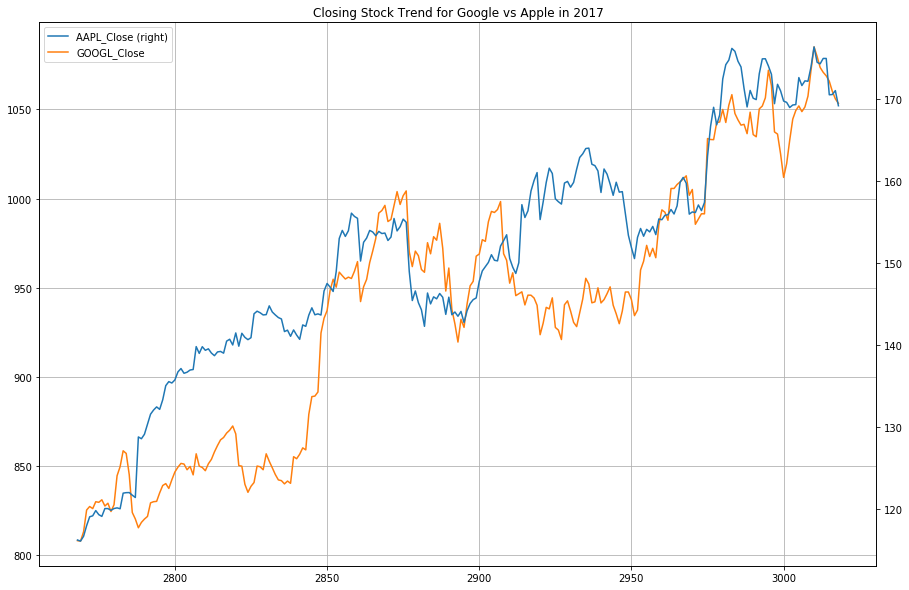

In [46]:
# Plotting closing stocks for Google vs Apple in 2017
googl_2017 = googl[(googl['Date']>='2017-01-01') & (googl['Date']<'2018-01-01')]
googl_2017.set_index('Date', inplace=False)
googl_appl_close_2017 = pd.DataFrame({"AAPL_Close": aapl_2017["Close"],
                                   "GOOGL_Close": googl_2017["Close"]
                                  })

plot1 = googl_appl_close_2017.plot(secondary_y=['AAPL_Close'], grid = True,figsize=(15,10), title="Closing Stock Trend for Google vs Apple in 2017")

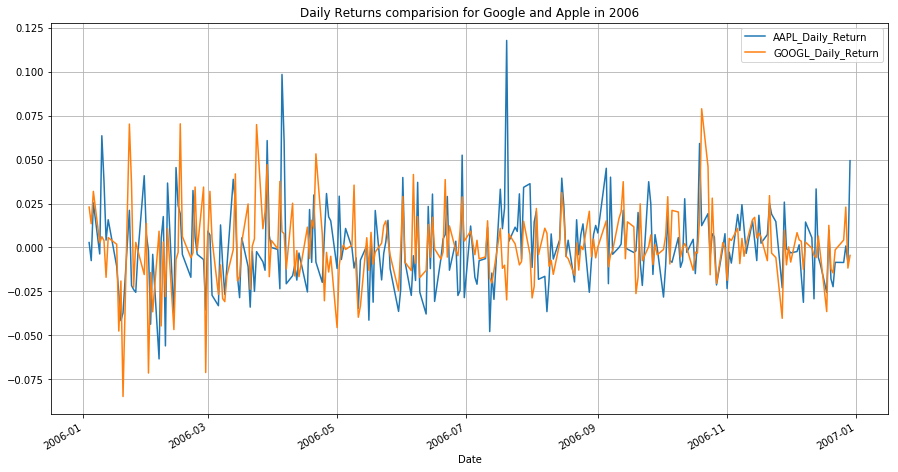

In [47]:
#Plotting the daily returns in year 2006 for Google vs Apple
googl_2006_return = googl_2006.set_index('Date', inplace=False)
return_aapl_googl = pd.DataFrame({"AAPL_Daily_Return" : aapl_2006_return['DailyReturn'],
                                 "GOOGL_Daily_Return" : googl_2006_return['DailyReturn']
                                 })
return_aapl_googl.plot(grid = True, figsize=(15, 8), title="Daily Returns comparision for Google and Apple in 2006")


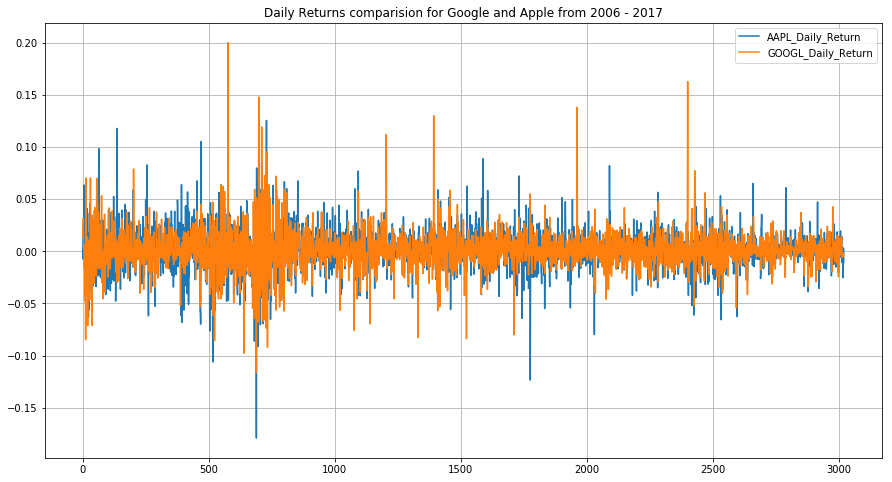

In [52]:
#Plotting the daily returns for 2006 - 2017 for Google vs Apple
return_aapl_googl = pd.DataFrame({"AAPL_Daily_Return" : aapl['DailyReturn'],
                                 "GOOGL_Daily_Return" : googl['DailyReturn']
                                 })
return_aapl_googl.plot(grid = True, figsize=(15, 8), title="Daily Returns comparision for Google and Apple from 2006 - 2017")


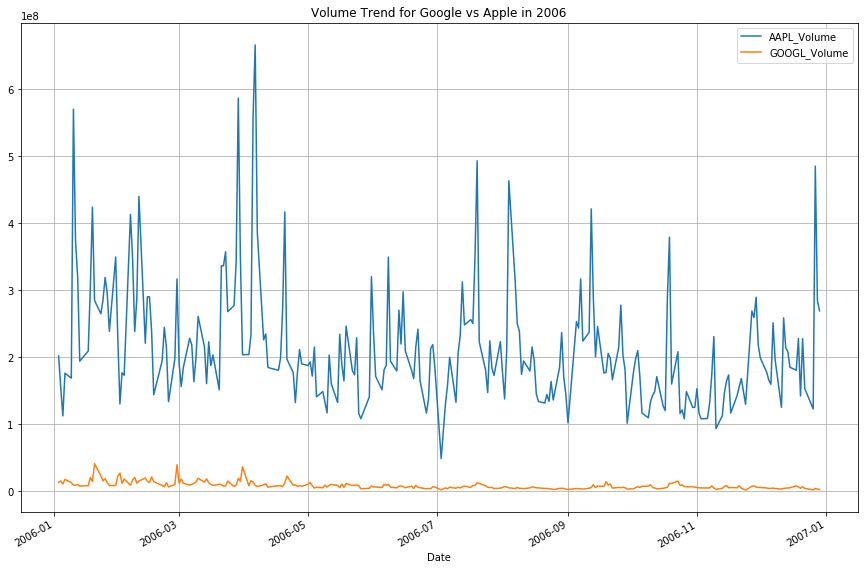

In [53]:
#Analyzing volume  in 2006
googl_volume_2006 = pd.DataFrame({"Date":googl_2006["Date"], "Volume": googl_2006["Volume"]})
googl_volume_2006 = googl_volume_2006.set_index('Date', inplace=False)

volume_aapl_googl_2006 = pd.DataFrame({"AAPL_Volume" : aapl_volume_2006['Volume'],
                                 "GOOGL_Volume" : googl_volume_2006['Volume']
                                 })

volume_aapl_googl_2006.plot(grid = True,figsize=(15,10), title="Volume Trend for Google vs Apple in 2006")


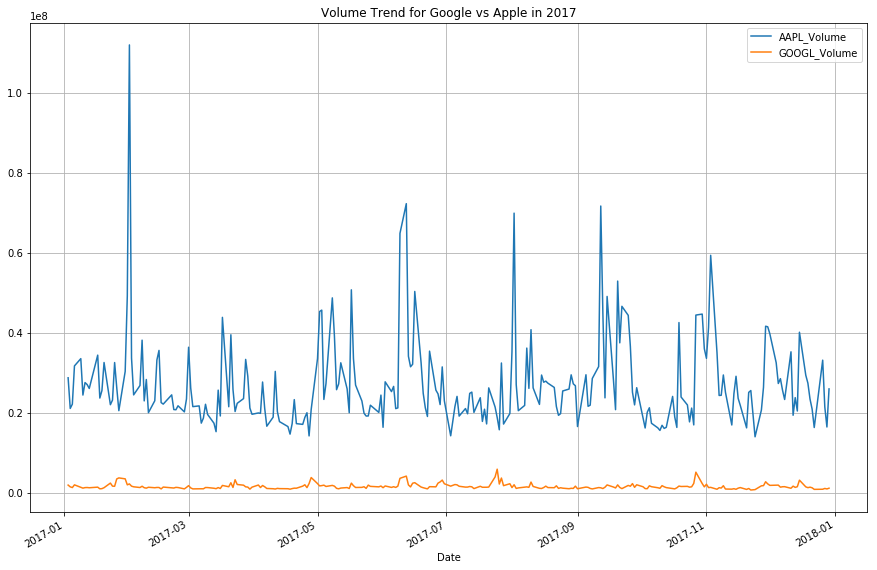

In [54]:
#Analyzing volume trends for Apple and Google in 2017
googl_volume_2017 = pd.DataFrame({"Date":googl_2017["Date"], "Volume": googl_2017["Volume"]})
googl_volume_2017 = googl_volume_2017.set_index('Date', inplace=False)

volume_aapl_googl_2017 = pd.DataFrame({"AAPL_Volume" : aapl_volume_2017['Volume'],
                                 "GOOGL_Volume" : googl_volume_2017['Volume']
                                 })

volume_aapl_googl_2017.plot(grid = True,figsize=(15,10), title="Volume Trend for Google vs Apple in 2017")


C:\Users\aditi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\aditi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



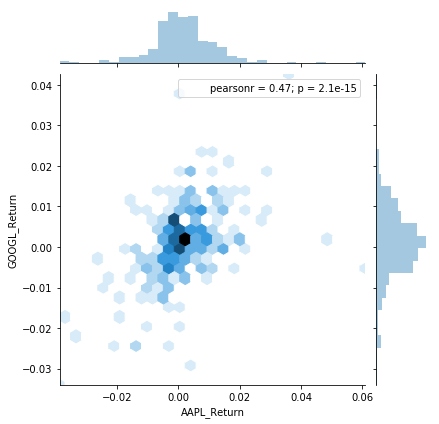

In [58]:
df_jointplot = pd.DataFrame({
    "AAPL_Return" : aapl_2017_return['DailyReturn'],
    "GOOGL_Return" : googl_2017_return['DailyReturn']
})
sns.jointplot(x='AAPL_Return',y='GOOGL_Return',data=df_jointplot ,kind='hex')

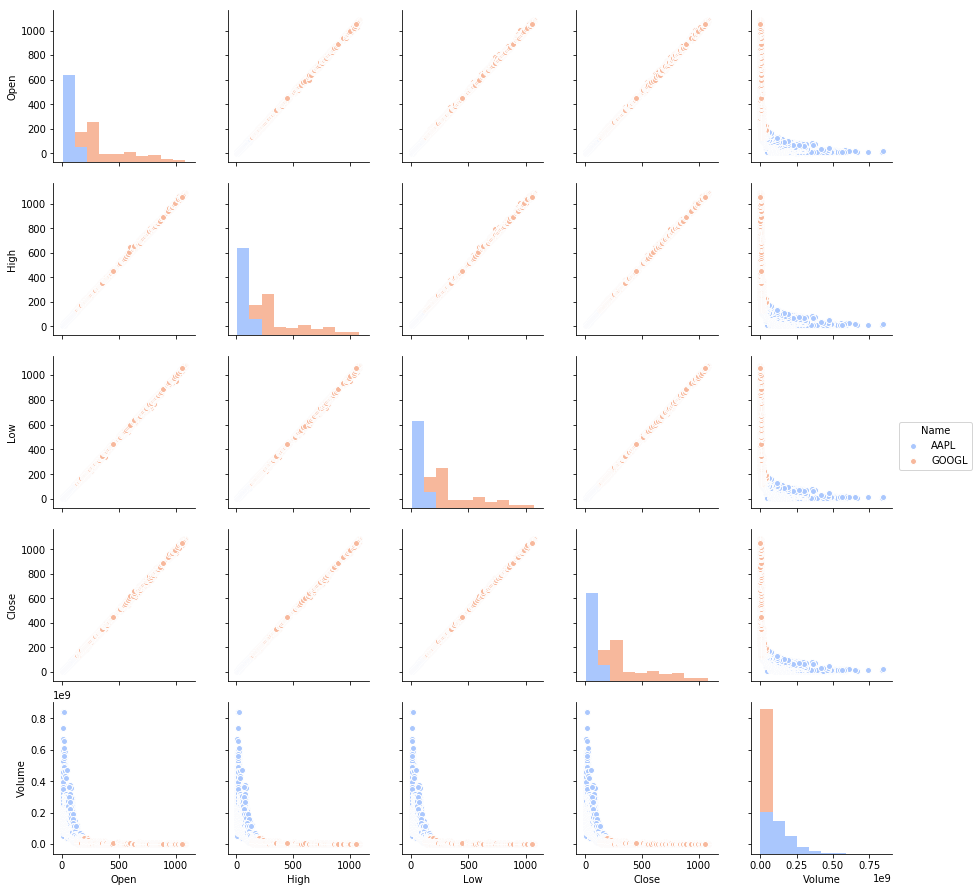

In [63]:
#Using Pairplot to compare attributes for APPL and GOOGL
#Reloading as transformations have been made
all_stock_reload = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
all_stock_reload['Year'] = pd.to_datetime(all_stock_reload['Date']).dt.year
df_pairplot = all_stock_reload[(all_stock_reload['Name'] == 'AAPL') | (all_stock_reload['Name'] == 'GOOGL')]
del df_pairplot['Year']
sns.pairplot(df_pairplot,hue='Name',palette='coolwarm')


In [71]:
'''
Question 4.
•	Comparing the stocks for MSFT, AAPL, GOOGL, IBM, INTC 
•	Visualizing the Closing stock price for all the 5 companies from 2006 – 2017. We can see that GOOGL has the highest 
    closing prices followed by AAPL.
•	Creating a boxplot to see the data of all the 5 companies. The outliers within the data can also be seen here.
•	Compared the volumes for December 2017 for all the 5 companies. We can see high volumes for MSFT and INTC
•	Comparing the daily returns for all 5 companies for the month December 2017. A lot of variation can be seen within 
    the month but one major peak point that can be seen is for INTC where it has a very high return on 18th December 2017.
•	Created a pairplot for all 5 companies. This plot gives an overall comparison of all the 5 parameters within the 5 companies.
•	Created a correlation matrix for the daily returns for the 5 stocks. We can see high correlation between the daily 
    returns for AAPL and INTC and for AAPL and GOOGL.
•	Created a correlation matrix for the volume for the 5 stocks. We can again see a high correlation between AAPL and GOOGL. 
    But also a high correlation between AAPL and MSFT.
‘’’

'\nQuestion4\n'

In [64]:
#Calculation Daily Returns
msft['Year'] = pd.to_datetime(msft['Date']).dt.year
ibm['Year'] = pd.to_datetime(ibm['Date']).dt.year
intc['Year'] = pd.to_datetime(intc['Date']).dt.year

#Calculating the daily return
msft['DailyReturn'] = msft['Close'].pct_change(1)
ibm['DailyReturn'] = ibm['Close'].pct_change(1)
intc['DailyReturn'] = intc['Close'].pct_change(1)

Text(0.5,0,'Date')

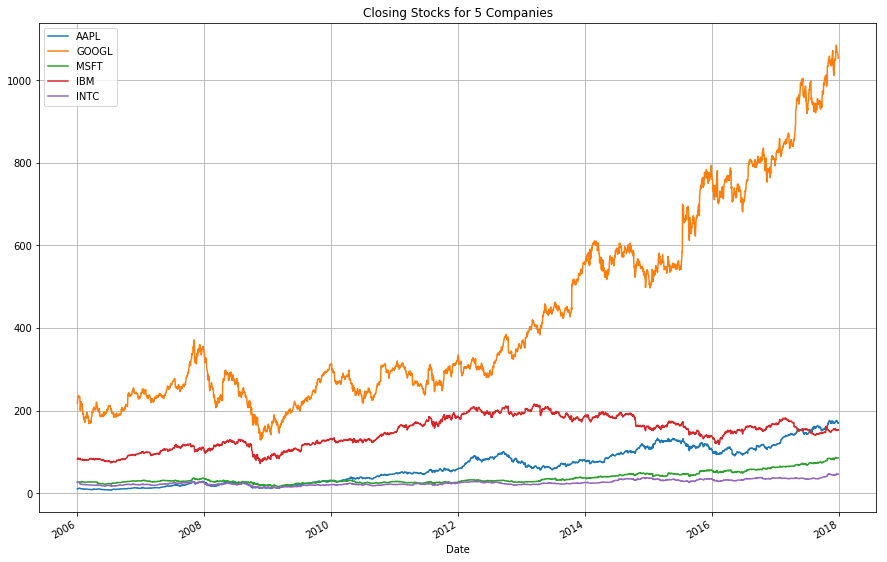

In [65]:
#Comparing the Closing Stocks for all the 5 companies
aapl_df = aapl.set_index('Date',inplace = False)
googl_df = googl.set_index('Date',inplace = False)
msft_df = msft.set_index('Date',inplace = False)
ibm_df = ibm.set_index('Date',inplace = False)
intc_df = intc.set_index('Date',inplace = False)

stocks = pd.DataFrame({"AAPL": aapl_df["Close"],
                      "GOOGL": googl_df["Close"],
                      "MSFT": msft_df["Close"],
                      "IBM": ibm_df["Close"],
                      "INTC": intc_df["Close"]})

stocks.plot(grid = True, figsize = (15,10), title = 'Closing Stocks for 5 Companies').set_xlabel("Date")

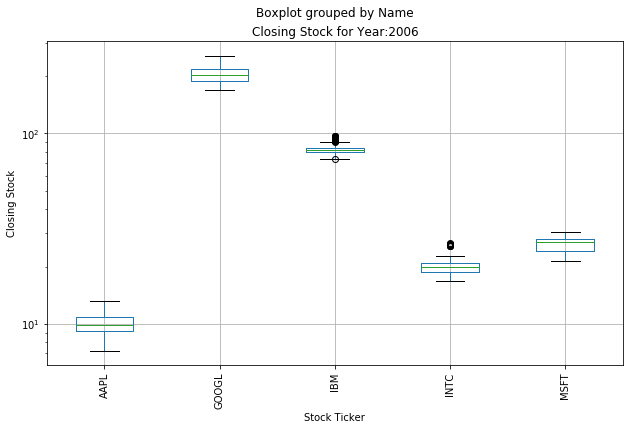

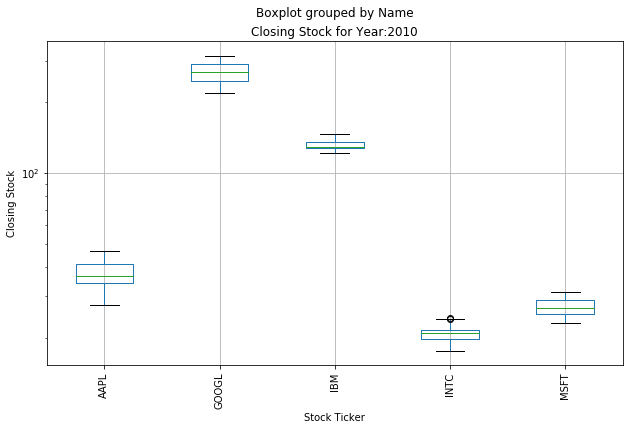

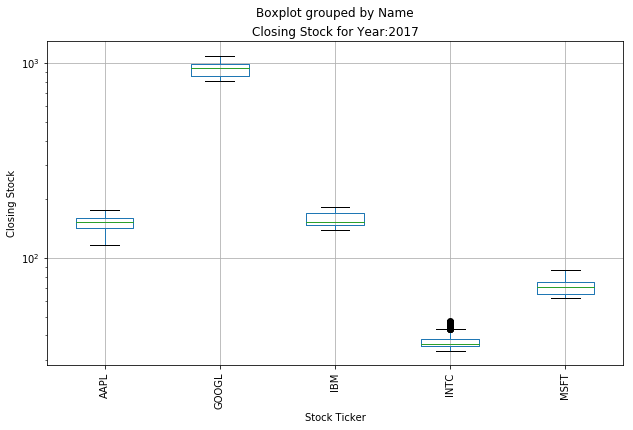

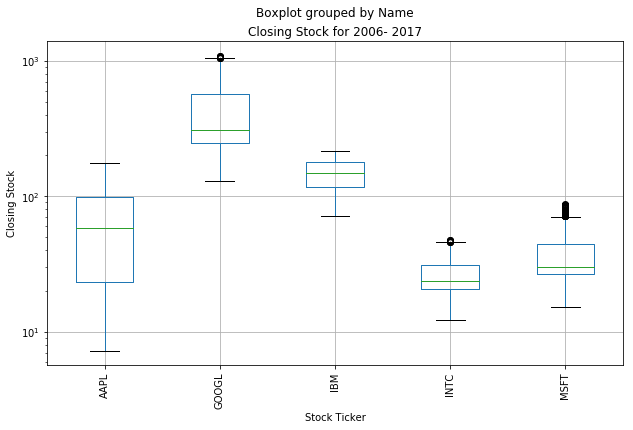

In [66]:
#Creating a Boxplot to see the data of "Close" for some years for all 5 companies
all_5 = all_stock[(all_stock['Name'] == 'AAPL') | (all_stock['Name'] == 'GOOGL') | (all_stock['Name'] == 'IBM') |
                 (all_stock['Name'] == 'MSFT') | (all_stock['Name'] == 'INTC')]

yearID = [2006, 2010, 2017]

for yr in yearID:
    df = all_5[all_5['Year'] == yr ]
    df.boxplot('Close', by = 'Name', rot=90, figsize = (10,6))
    plt.title("Closing Stock for Year:" + str(yr))
    plt.xlabel("Stock Ticker")
    plt.ylabel("Closing Stock")
    plt.yscale('log')
    
all_5.boxplot('Close', by = 'Name', rot=90, figsize = (10,6))
plt.title("Closing Stock for 2006- 2017")
plt.xlabel("Stock Ticker")
plt.ylabel("Closing Stock")
plt.yscale('log')

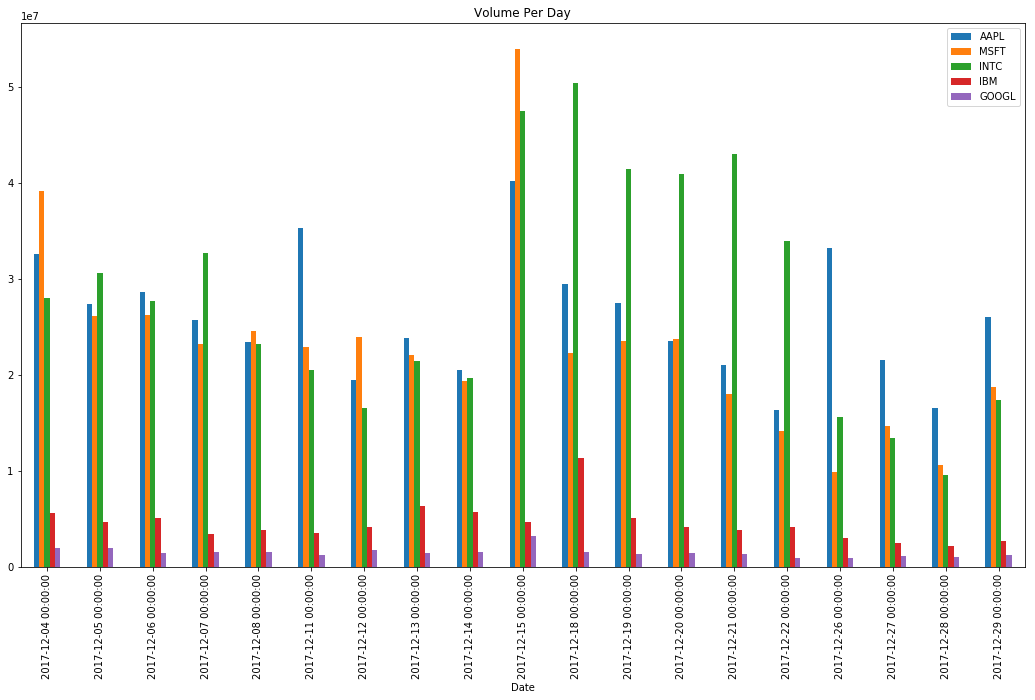

In [67]:
#Comparing volumes for December 2017
volume = pd.DataFrame({
    "Date": aapl['Date'],
                        "AAPL": aapl["Volume"],
                      "MSFT": msft["Volume"],
                      "INTC": intc["Volume"], 
                        "IBM": ibm["Volume"],
                    "GOOGL": googl["Volume"]})

volume = volume[volume['Date']>'2017-12-01']
volume.set_index('Date',inplace=True)
volume.plot.bar(stacked=False,figsize=(18,10), title="Volume Per Day")

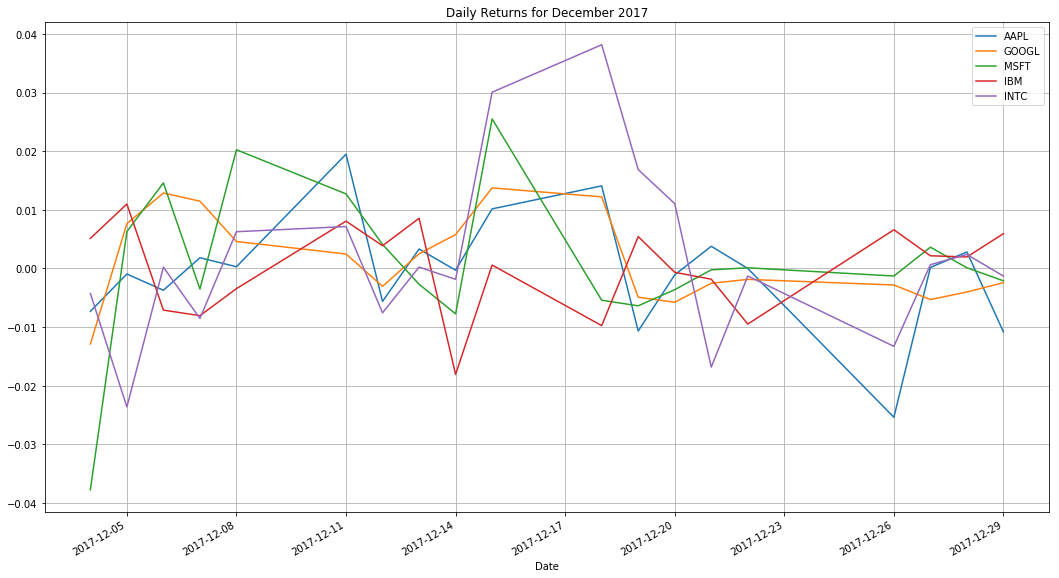

In [68]:
#Comparing daily returns for December 2017 - Peak in INTC
dailyReturn = pd.DataFrame({
    "Date": aapl['Date'],
                        "AAPL": aapl["DailyReturn"],
                      "GOOGL": googl["DailyReturn"],
                      "MSFT": msft["DailyReturn"],
                      "IBM": ibm["DailyReturn"],
                      "INTC": intc["DailyReturn"]})

dailyReturn = dailyReturn[dailyReturn['Date']>'2017-12-01']
dailyReturn = dailyReturn.set_index('Date',inplace=False)
dailyReturn.plot(figsize=(18,10), title="Daily Returns for December 2017", grid=True)

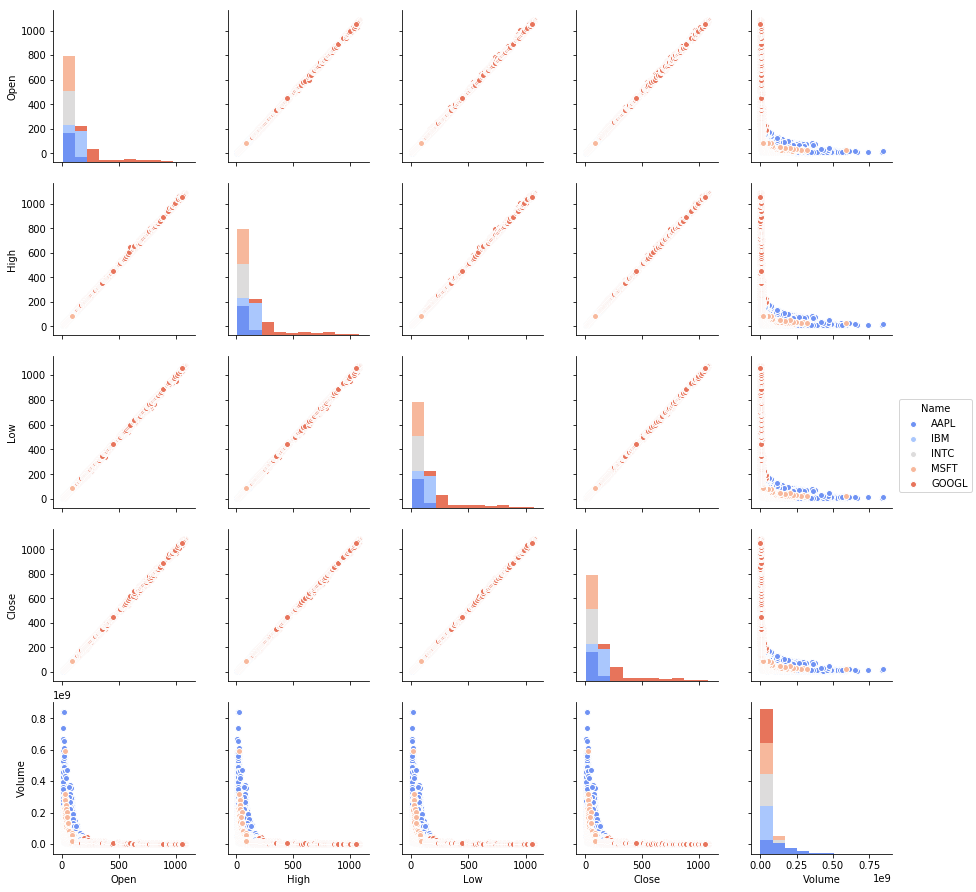

In [70]:
#Pairplot for all 5 companies
df_pairplot1 = all_stock_reload[(all_stock_reload['Name'] == 'AAPL') | (all_stock_reload['Name'] == 'GOOGL') | (all_stock_reload['Name'] == 'IBM') |
                 (all_stock_reload['Name'] == 'MSFT') | (all_stock_reload['Name'] == 'INTC')]
del df_pairplot1['Year']
sns.pairplot(df_pairplot1,hue='Name',palette='coolwarm')

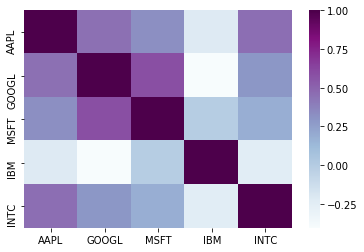

In [71]:
#Correlation between the daily returns for the 5 stocks
sns.heatmap(dailyReturn.corr(), cmap="BuPu")

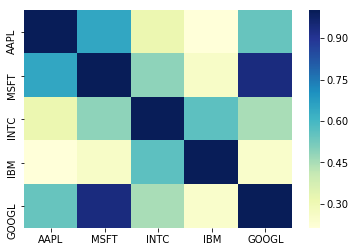

In [72]:
#Correlation between the volumes for the 5 stocks
sns.heatmap(volume.corr(), cmap="YlGnBu")